## R Data Structures

<img src="IMAGES/R_Logo.png" style="height:50px;float:right;">
- **[Data Structures](http://adv-r.had.co.nz/Data-structures.html)**

<table style="float:left;">
<thead>
<tr class="header">
<th align="left"></th>
<th align="left">Homogeneous</th>
<th align="left">Heterogeneous</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">1d</td>
<td align="left">Atomic vector</td>
<td align="left">List</td>
</tr>
<tr class="even">
<td align="left">2d</td>
<td align="left">Matrix</td>
<td align="left">Data frame</td>
</tr>
<tr class="odd">
<td align="left">nd</td>
<td align="left">Array</td>
<td align="left"></td>
</tr>
</tbody>
</table>

In [1]:
?vector             # COLLECTION OF PRIMIIVE, EQUAL TYPE VALUES
?matrix             # VECTOR WITH dim()
?list               # COLLECTION OF DIFFERENT OBJECTS
?data.frame         # LIST OF EQUAL-LENGTH VECTORS

## Defining Modules

In [2]:
library(base)       # REDUNDANT
library(stats)      # REDUNDANT
library(utils)      # REDUNDANT

## Import Data

### Source: [CTA Ridership 'L' Stations](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f)

In [3]:
?utils::read.table

### Other I/O Tools:

- **[data.table::fread](https://www.rdocumentation.org/packages/data.table/versions/1.11.4/topics/fread)**
- **[reader::read_table](https://www.rdocumentation.org/packages/readr/versions/0.1.1/topics/read_table)**

In [1]:
setwd('/path/to/working/directory')

rides_df <- read.table('DATA/CTA_Ridership_L_Station_Entries_DailyTotals.csv', header=TRUE, quote = "\"", sep=",")

head(rides_df)

station_id stationname        date       daytype rides
1 40010      Austin-Forest Park 01/01/2001 U        290 
2 40020      Harlem-Lake        01/01/2001 U        633 
3 40030      Pulaski-Lake       01/01/2001 U        483 
4 40040      Quincy/Wells       01/01/2001 U        374 
5 40050      Davis              01/01/2001 U        804 
6 40060      Belmont-O'Hare     01/01/2001 U       1165

In [5]:
rides_df <- read.csv('DATA/CTA_Ridership_L_Station_Entries_DailyTotals.csv')

tail(rides_df, 10)

station_id stationname       date       daytype rides
897023 41700      Washington/Wabash 03/22/2018 W       10101
897024 41700      Washington/Wabash 03/23/2018 W        9466
897025 41700      Washington/Wabash 03/24/2018 A        4729
897026 41700      Washington/Wabash 03/25/2018 U        3507
897027 41700      Washington/Wabash 03/26/2018 W        9143
897028 41700      Washington/Wabash 03/27/2018 W        9457
897029 41700      Washington/Wabash 03/28/2018 W       10091
897030 41700      Washington/Wabash 03/29/2018 W        9427
897031 41700      Washington/Wabash 03/30/2018 W        9305
897032 41700      Washington/Wabash 03/31/2018 A        4319

In [6]:
str(rides_df)

'data.frame':	897032 obs. of  5 variables:
 $ station_id : int  40010 40020 40030 40040 40050 40060 40070 40080 40090 40100 ...
 $ stationname: Factor w/ 148 levels "18th","35-Bronzeville-IIT",..: 23 70 120 122 52 26 78 130 49 109 ...
 $ date       : Factor w/ 6299 levels "01/01/2001","01/01/2002",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ daytype    : Factor w/ 3 levels "A","U","W": 2 2 2 2 2 2 2 2 2 2 ...
 $ rides      : int  290 633 483 374 804 1165 649 1116 411 1698 ...


In [7]:
summary(rides_df)

   station_id                 stationname             date        daytype   
 Min.   :40010   Racine             :  6319   08/01/2011:   168   A:127609  
 1st Qu.:40370   Montrose-Brown     :  6317   07/21/2011:   167   U:142698  
 Median :40750   Monroe/Dearborn    :  6316   08/06/2011:   164   W:626725  
 Mean   :40761   Western-Forest Park:  6316   07/23/2011:   163             
 3rd Qu.:41150   Montrose-O'Hare    :  6315   07/03/2011:   162             
 Max.   :41700   Indiana            :  6314   07/18/2011:   161             
                 (Other)            :859135   (Other)   :896047             
     rides      
 Min.   :    0  
 1st Qu.: 1121  
 Median : 2316  
 Mean   : 3305  
 3rd Qu.: 4348  
 Max.   :36323  
                

## XML Data

### Source: [CTA 'L' Stops System Information](https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme)

In [2]:
txt = '<?xml version="1.0" encoding="UTF-8"?>
<response>
  <row>
    <row _id="1" _uuid="35A6C0EA-CE03-47C5-987C-825C37C76DF3" _position="1" _address="https://data.cityofchicago.org/resource/_8pix-ypme/1">
      <stop_id>30161</stop_id>
      <direction_id>E</direction_id>
      <stop_name>18th (Loop-bound)</stop_name>
      <station_name>18th</station_name>
      <station_descriptive_name>18th (Pink Line)</station_descriptive_name>
      <map_id>40830</map_id>
      <ada>true</ada>
      <red>false</red>
      <blue>false</blue>
      <g>false</g>
      <brn>false</brn>
      <p>false</p>
      <pexp>false</pexp>
      <y>false</y>
      <pnk>true</pnk>
      <o>false</o>
      <location latitude="41.857908" longitude="-87.669147" needs_recoding="false"/>
    </row>
    <row _id="2" _uuid="BC49ED7D-D418-4432-BFB2-7A3DD78A5AAF" _position="2" _address="https://data.cityofchicago.org/resource/_8pix-ypme/2">
      <stop_id>30162</stop_id>
      <direction_id>W</direction_id>
      <stop_name>18th (54th/Cermak-bound)</stop_name>
      <station_name>18th</station_name>
      <station_descriptive_name>18th (Pink Line)</station_descriptive_name>
      <map_id>40830</map_id>
      <ada>true</ada>
      <red>false</red>
      <blue>false</blue>
      <g>false</g>
      <brn>false</brn>
      <p>false</p>
      <pexp>false</pexp>
      <y>false</y>
      <pnk>true</pnk>
      <o>false</o>
      <location latitude="41.857908" longitude="-87.669147" needs_recoding="false"/>
    </row>
    <row _id="3" _uuid="F5415CA3-49A6-4334-86A5-C9D1BDC5F74E" _position="3" _address="https://data.cityofchicago.org/resource/_8pix-ypme/3">
      <stop_id>30022</stop_id>
      <direction_id>N</direction_id>
      <stop_name>35th/Archer (Loop-bound)</stop_name>
      <station_name>35th/Archer</station_name>
      <station_descriptive_name>35th/Archer (Orange Line)</station_descriptive_name>
      <map_id>40120</map_id>
      <ada>true</ada>
      <red>false</red>
      <blue>false</blue>
      <g>false</g>
      <brn>false</brn>
      <p>false</p>
      <pexp>false</pexp>
      <y>false</y>
      <pnk>false</pnk>
      <o>true</o>
      <location latitude="41.829353" longitude="-87.680622" needs_recoding="false"/>
    </row>
'
library(XML)

doc <- xmlParse('DATA/CTA_System_L_Stops.xml')
xml_df <- xmlToDataFrame(nodes=getNodeSet(doc, "//response/row/row"))

# COLUMN NAME CLEAN-UP
names(xml_df)[grep("^g$|^brn$|^p$|^pexp$|^y$|^pnk$|^o$", names(xml_df))] <- c("green", "brown", "purple", "purple_exp", 
                                                                              "yellow", "pink", "orange")

# BOOLEAN CONVERSION CLEAN-UP
xml_df[c("ada", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")] <- 
      sapply(xml_df[c("ada", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")], 
             function(x) ifelse(x == "true", TRUE, FALSE))

head(xml_df)

stop_id direction_id stop_name                         station_name        
1 30161   E            18th (Loop-bound)                 18th                
2 30162   W            18th (54th/Cermak-bound)          18th                
3 30022   N            35th/Archer (Loop-bound)          35th/Archer         
4 30023   S            35th/Archer (Midway-bound)        35th/Archer         
5 30213   N            35-Bronzeville-IIT (Harlem-bound) 35th-Bronzeville-IIT
6 30214   S            35-Bronzeville-IIT (63rd-bound)   35th-Bronzeville-IIT
  station_descriptive_name          map_id ada  red   blue  green brown purple
1 18th (Pink Line)                  40830  TRUE FALSE FALSE FALSE FALSE FALSE 
2 18th (Pink Line)                  40830  TRUE FALSE FALSE FALSE FALSE FALSE 
3 35th/Archer (Orange Line)         40120  TRUE FALSE FALSE FALSE FALSE FALSE 
4 35th/Archer (Orange Line)         40120  TRUE FALSE FALSE FALSE FALSE FALSE 
5 35th-Bronzeville-IIT (Green Line) 41120  TRUE FALSE FALSE  TRUE FALSE FALSE 
6 35th-Bronzeville-IIT (Green Line) 41120  TRUE FALSE FALSE  TRUE FALSE FALSE 
  purple_exp yellow pink  orange location
1 FALSE      FALSE   TRUE FALSE          
2 FALSE      FALSE   TRUE FALSE          
3 FALSE      FALSE  FALSE  TRUE          
4 FALSE      FALSE  FALSE  TRUE          
5 FALSE      FALSE  FALSE FALSE          
6 FALSE      FALSE  FALSE FALSE

## JSON Data

In [3]:
txt = '[
    {
        "y": false,
        "map_id": "40830",
        "station_descriptive_name": "18th (Pink Line)",
        "pexp": false,
        "longitude": "-87.669147",
        "red": false,
        "stop_name": "18th (Loop-bound)",
        "brn": false,
        "p": false,
        "g": false,
        "ada": true,
        "latitude": "41.857908",
        "station_name": "18th",
        "blue": false,
        "stop_id": "30161",
        "pnk": true,
        "direction_id": "E",
        "o": false
    },
    {
        "y": false,
        "map_id": "40830",
        "station_descriptive_name": "18th (Pink Line)",
        "pexp": false,
        "longitude": "-87.669147",
        "red": false,
        "stop_name": "18th (54th/Cermak-bound)",
        "brn": false,
        "p": false,
        "g": false,
        "ada": true,
        "latitude": "41.857908",
        "station_name": "18th",
        "blue": false,
        "stop_id": "30162",
        "pnk": true,
        "direction_id": "W",
        "o": false
    },
    ...
'

library(jsonlite)

# CONVERT TO JSON
x <- toJSON(xml_df, pretty=TRUE)

# EXPORT TO FILE
fileConn<-file("DATA/CTA_System_L_Stops.json")
writeLines(x, fileConn)
close(fileConn)

rm(fileConn, x, txt)


json_df <- do.call(rbind, lapply(paste(readLines("DATA/CTA_System_L_Stops.json", warn=FALSE), collapse=""), 
                                 jsonlite::fromJSON))

# COLUMN NAME CLEAN-UP
names(json_df)[grep("^g$|^brn$|^p$|^pexp$|^y$|^pnk$|^o$", names(json_df))] <- c("green", "brown", "purple", "purple_exp", 
                                                                                "yellow", "pink", "orange")

# BOOLEAN CONVERSION CLEAN-UP
json_df[c("ada", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")] <- 
      sapply(json_df[c("ada", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")], 
             function(x) ifelse(x == "true", TRUE, FALSE))
             
head(json_df)

stop_id direction_id stop_name                         station_name        
1 30161   E            18th (Loop-bound)                 18th                
2 30162   W            18th (54th/Cermak-bound)          18th                
3 30022   N            35th/Archer (Loop-bound)          35th/Archer         
4 30023   S            35th/Archer (Midway-bound)        35th/Archer         
5 30213   N            35-Bronzeville-IIT (Harlem-bound) 35th-Bronzeville-IIT
6 30214   S            35-Bronzeville-IIT (63rd-bound)   35th-Bronzeville-IIT
  station_descriptive_name          map_id ada   red   blue  green brown purple
1 18th (Pink Line)                  40830  FALSE FALSE FALSE FALSE FALSE FALSE 
2 18th (Pink Line)                  40830  FALSE FALSE FALSE FALSE FALSE FALSE 
3 35th/Archer (Orange Line)         40120  FALSE FALSE FALSE FALSE FALSE FALSE 
4 35th/Archer (Orange Line)         40120  FALSE FALSE FALSE FALSE FALSE FALSE 
5 35th-Bronzeville-IIT (Green Line) 41120  FALSE FALSE FALSE FALSE FALSE FALSE 
6 35th-Bronzeville-IIT (Green Line) 41120  FALSE FALSE FALSE FALSE FALSE FALSE 
  purple_exp yellow pink  orange location
1 FALSE      FALSE  FALSE FALSE          
2 FALSE      FALSE  FALSE FALSE          
3 FALSE      FALSE  FALSE FALSE          
4 FALSE      FALSE  FALSE FALSE          
5 FALSE      FALSE  FALSE FALSE          
6 FALSE      FALSE  FALSE FALSE

## SQL Data

In [39]:
library(DBI)
library(RSQLite)

conn <- dbConnect(SQLite(), dbname = "DATA/CTA_Data.db")

### EXPORT DATAFRAMES
rides_df$date <- as.POSIXct(as.character(rides_df$date), format="%m/%d/%Y")

dbWriteTable(conn, name="Ridership", value=rides_df, overwrite=TRUE)
dbWriteTable(conn, name="Stations", value=xml_df, overwrite=TRUE)

### CREATE INDEXES
output <- dbSendQuery(conn, "CREATE INDEX station_idx ON Ridership (station_id)")
dbClearResult(output)

output <- dbSendQuery(conn, "CREATE INDEX map_idx ON Stations (map_id)")
dbClearResult(output)

### IMPORT DATAFRAME
sql_df <- dbGetQuery(conn, "SELECT * FROM Ridership r INNER JOIN Stations s ON r.station_id = s.map_id")

dbDisconnect(conn)

head(sql_df)

station_id stationname date      daytype rides stop_id direction_id
1 40830      18th        978328800 U         0   30161   E           
2 40830      18th        978415200 W       813   30161   E           
3 40830      18th        978501600 W       881   30161   E           
4 40830      18th        978588000 W       884   30161   E           
5 40830      18th        978674400 W       925   30161   E           
6 40830      18th        978760800 A         2   30161   E           
  stop_name         station_name station_descriptive_name ⋯ red blue green
1 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
2 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
3 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
4 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
5 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
6 18th (Loop-bound) 18th         18th (Pink Line)         ⋯ 0   0    0    
  brown purple purple_exp yellow pink orange location
1 0     0      0          0      1    0              
2 0     0      0          0      1    0              
3 0     0      0          0      1    0              
4 0     0      0          0      1    0              
5 0     0      0          0      1    0              
6 0     0      0          0      1    0

In [11]:
dim(sql_df)

[1] 1851314      22

## Data Processing

In [11]:
### BUILD A LIST OF GROUPED DATA FRAMES
stations_dfs <- split(rides_df, rides_df$stationname)

head(stations_dfs$`Clark/Lake`)

head(stations_dfs$`Merchandise Mart`)

head(stations_dfs$`Jefferson Park`)

station_id stationname date       daytype rides
37  40380      Clark/Lake  2001-01-01 U        1080
178 40380      Clark/Lake  2001-01-02 W       13263
319 40380      Clark/Lake  2001-01-03 W       14416
460 40380      Clark/Lake  2001-01-04 W       15118
601 40380      Clark/Lake  2001-01-05 W       14980
742 40380      Clark/Lake  2001-01-06 A        2267

station_id stationname      date       daytype rides
44  40460      Merchandise Mart 2001-01-01 U        185 
185 40460      Merchandise Mart 2001-01-02 W       5350 
326 40460      Merchandise Mart 2001-01-03 W       5766 
467 40460      Merchandise Mart 2001-01-04 W       5824 
608 40460      Merchandise Mart 2001-01-05 W       5554 
749 40460      Merchandise Mart 2001-01-06 A        775

station_id stationname    date       daytype rides
121 41280      Jefferson Park 2001-01-01 U       1302 
262 41280      Jefferson Park 2001-01-02 W       5812 
403 41280      Jefferson Park 2001-01-03 W       6171 
544 41280      Jefferson Park 2001-01-04 W       6385 
685 41280      Jefferson Park 2001-01-05 W       6334 
826 41280      Jefferson Park 2001-01-06 A       2692

In [14]:
head(do.call(rbind, unname(stations_dfs)), 10)

station_id stationname date       daytype rides
80   40830      18th        2001-01-01 U         0  
221  40830      18th        2001-01-02 W       813  
362  40830      18th        2001-01-03 W       881  
503  40830      18th        2001-01-04 W       884  
644  40830      18th        2001-01-05 W       925  
785  40830      18th        2001-01-06 A         2  
926  40830      18th        2001-01-07 U         0  
1067 40830      18th        2001-01-08 W       981  
1208 40830      18th        2001-01-09 W       979  
1349 40830      18th        2001-01-10 W       987

## Data Diagnostics

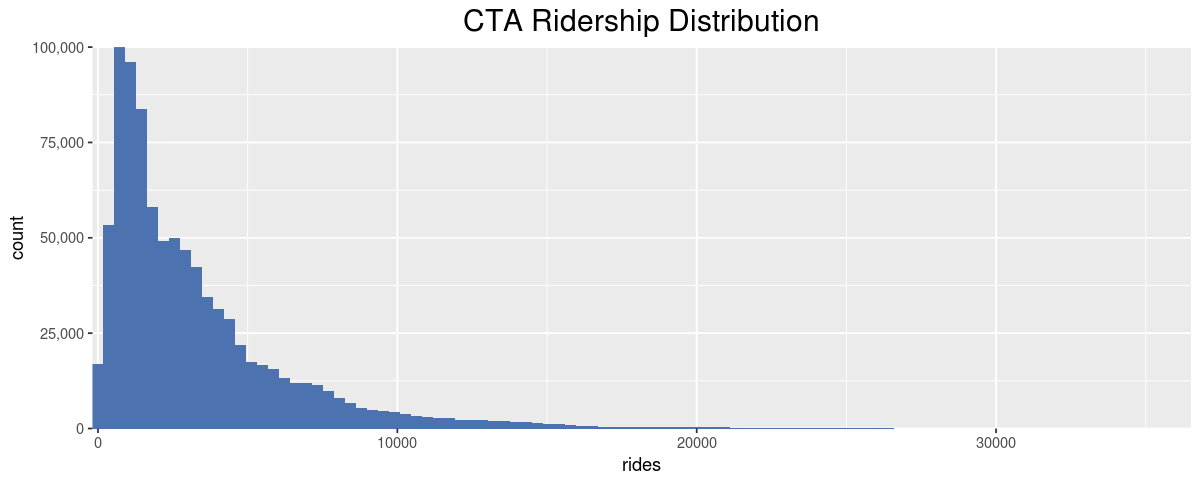

In [5]:
library(ggplot2)
library(scales)

options(repr.plot.width=10, repr.plot.height=4)

seabornPalette <- c("#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2",
                    "#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868",
                    "#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd",
                    "#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2",
                    "#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868",
                    "#c44e52","#8172b2","#ccb974","#64b5cd","#4c72b0","#55a868","#c44e52","#8172b2","#ccb974","#64b5cd")

ggplot(rides_df, aes(x=rides)) +
  geom_histogram(fill="#4c72b0", bins=100) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), limits=c(0, 100000), label=comma) +
  labs(title="CTA Ridership Distribution") +
   theme(plot.title = element_text(hjust=0.5, size=18))

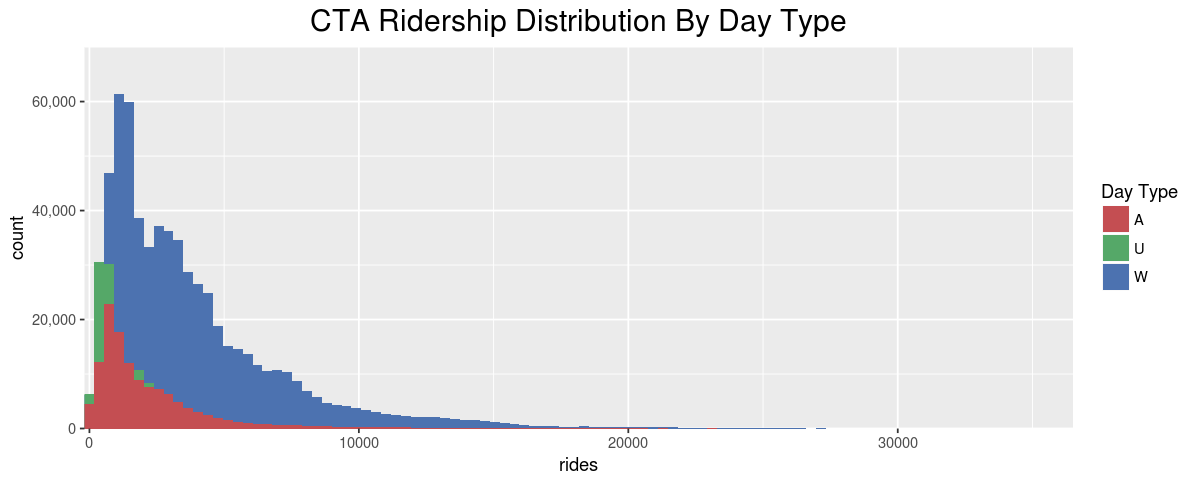

In [6]:
ggplot(rides_df, aes(x=rides, fill=daytype)) +
   geom_histogram(data=subset(rides_df, daytype == 'W'), bins=100) +
   geom_histogram(data=subset(rides_df, daytype == 'U'), bins=100) +
   geom_histogram(data=subset(rides_df, daytype == 'A'), bins=100) +
   scale_x_continuous(expand = c(0, 0)) +
   scale_y_continuous(expand = c(0, 0), limits=c(0, 70000), label=comma) +
   scale_fill_manual(values = c(W = "#4c72b0", U = "#55a868", A = "#c44e52")) +
   labs(title="CTA Ridership Distribution By Day Type", fill="Day Type") +
   theme(plot.title = element_text(hjust=0.5, size=18))

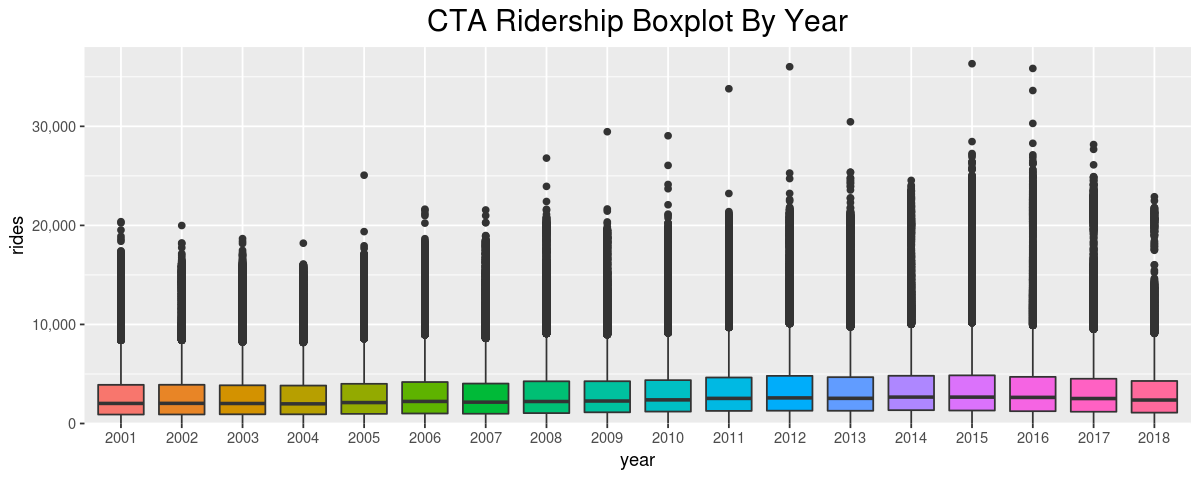

In [17]:
ggplot(transform(rides_df, year = as.factor(format(rides_df$date, '%Y'))), aes(x=year, y=rides, fill=year)) + 
    geom_boxplot() + guides(fill=FALSE) +
    scale_y_continuous(expand = c(0, 0), lim=c(0,38000), label=comma) +
    labs(title="CTA Ridership Boxplot By Year") +
    theme(plot.title = element_text(hjust=0.5, size=18))

## Aggregate Data

In [24]:
agg_df <- do.call(data.frame, aggregate(rides ~ stationname, rides_df, 
                                        FUN = function(x) c(rides_count = length(x),
                                                            rides_total = sum(x),
                                                            rides_mean = mean(x),
                                                            rides_median = median(x),
                                                            rides_min = min(x),
                                                            rides_max = max(x))))
                                        
# RENAME COLUMNS
names(agg_df) <- gsub("rides.", "", names(agg_df))             
                                         
# REORDER ROWS
agg_df <- with(agg_df, agg_df[order(-total),])
                                        
head(agg_df, 10)

stationname        count total    mean      median  min  max  
44  Clark/Lake         6300  87291814 13855.843 16026.0  601 30295
90  Lake/State         6301  86022732 13652.235 13816.0    0 35845
39  Chicago/State      6299  81619341 12957.508 13495.0    0 26312
13  95th/Dan Ryan      6274  67108423 10696.274 11741.5    0 18904
25  Belmont-North Main 6299  65913539 10464.127 10500.0 1238 36323
61  Fullerton          6300  64663543 10264.054 10424.5  705 18333
65  Grand/State        6302  59961752  9514.718  9462.0    0 24726
115 O'Hare Airport     6299  57191517  9079.460  8932.0    0 18646
79  Jackson/State      6307  56163674  8904.974 10010.0    0 23939
127 Roosevelt          6311  53345696  8452.812  8448.0 1235 22136

## Correlation

In [25]:
aggdf <- aggregate(rides ~ stationname + year, transform(rides_df, year = format(rides_df$date, "%Y")), sum)

rdf <- reshape(aggdf, idvar="stationname", v.names = "rides", timevar = "year", direction="wide")
names(rdf) <- gsub("rides.", "", names(rdf))

cor(rdf[-1], use = "complete.obs", method="pearson")

2001      2002      2003      2004      2005      2006      2007     
2001 1.0000000 0.9974340 0.9953657 0.9911369 0.9770509 0.9859070 0.9758966
2002 0.9974340 1.0000000 0.9975074 0.9922933 0.9783725 0.9871221 0.9738838
2003 0.9953657 0.9975074 1.0000000 0.9962903 0.9842552 0.9910797 0.9742083
2004 0.9911369 0.9922933 0.9962903 1.0000000 0.9950217 0.9942403 0.9724010
2005 0.9770509 0.9783725 0.9842552 0.9950217 1.0000000 0.9907567 0.9627646
2006 0.9859070 0.9871221 0.9910797 0.9942403 0.9907567 1.0000000 0.9818496
2007 0.9758966 0.9738838 0.9742083 0.9724010 0.9627646 0.9818496 1.0000000
2008 0.9695239 0.9670656 0.9664770 0.9657222 0.9573776 0.9744044 0.9793157
2009 0.9751085 0.9763540 0.9753820 0.9695135 0.9572673 0.9812478 0.9812459
2010 0.9730845 0.9761546 0.9753886 0.9691864 0.9562954 0.9806858 0.9807584
2011 0.9685206 0.9721228 0.9723494 0.9673703 0.9558224 0.9795908 0.9766378
2012 0.9628471 0.9663818 0.9681459 0.9642732 0.9536392 0.9775191 0.9730291
2013 0.8938062 0.8997860 0.9029244 0.8988903 0.8892614 0.9191272 0.9112443
2014 0.9528178 0.9566791 0.9581221 0.9510575 0.9362829 0.9648192 0.9597393
2015 0.9477016 0.9490103 0.9505524 0.9419474 0.9255210 0.9551016 0.9537378
2016 0.9400317 0.9414395 0.9434951 0.9345531 0.9180289 0.9471949 0.9437441
2017 0.9360673 0.9369020 0.9394723 0.9315917 0.9158361 0.9440195 0.9390057
2018 0.9181697 0.9199890 0.9207845 0.9122347 0.8952301 0.9219395 0.9132630
     2008      2009      2010      2011      2012      2013      2014     
2001 0.9695239 0.9751085 0.9730845 0.9685206 0.9628471 0.8938062 0.9528178
2002 0.9670656 0.9763540 0.9761546 0.9721228 0.9663818 0.8997860 0.9566791
2003 0.9664770 0.9753820 0.9753886 0.9723494 0.9681459 0.9029244 0.9581221
2004 0.9657222 0.9695135 0.9691864 0.9673703 0.9642732 0.8988903 0.9510575
2005 0.9573776 0.9572673 0.9562954 0.9558224 0.9536392 0.8892614 0.9362829
2006 0.9744044 0.9812478 0.9806858 0.9795908 0.9775191 0.9191272 0.9648192
2007 0.9793157 0.9812459 0.9807584 0.9766378 0.9730291 0.9112443 0.9597393
2008 1.0000000 0.9874859 0.9811783 0.9772898 0.9734626 0.9102674 0.9582459
2009 0.9874859 1.0000000 0.9970367 0.9936802 0.9898495 0.9345189 0.9788040
2010 0.9811783 0.9970367 1.0000000 0.9983893 0.9954693 0.9435987 0.9864485
2011 0.9772898 0.9936802 0.9983893 1.0000000 0.9984195 0.9530732 0.9910598
2012 0.9734626 0.9898495 0.9954693 0.9984195 1.0000000 0.9594675 0.9930600
2013 0.9102674 0.9345189 0.9435987 0.9530732 0.9594675 1.0000000 0.9657127
2014 0.9582459 0.9788040 0.9864485 0.9910598 0.9930600 0.9657127 1.0000000
2015 0.9509070 0.9691482 0.9758838 0.9801382 0.9820492 0.9551222 0.9873653
2016 0.9410820 0.9609399 0.9680998 0.9733251 0.9757620 0.9524862 0.9821501
2017 0.9370143 0.9553300 0.9631750 0.9691722 0.9724067 0.9529151 0.9805756
2018 0.9139799 0.9327713 0.9420035 0.9489083 0.9522250 0.9366028 0.9624335
     2015      2016      2017      2018     
2001 0.9477016 0.9400317 0.9360673 0.9181697
2002 0.9490103 0.9414395 0.9369020 0.9199890
2003 0.9505524 0.9434951 0.9394723 0.9207845
2004 0.9419474 0.9345531 0.9315917 0.9122347
2005 0.9255210 0.9180289 0.9158361 0.8952301
2006 0.9551016 0.9471949 0.9440195 0.9219395
2007 0.9537378 0.9437441 0.9390057 0.9132630
2008 0.9509070 0.9410820 0.9370143 0.9139799
2009 0.9691482 0.9609399 0.9553300 0.9327713
2010 0.9758838 0.9680998 0.9631750 0.9420035
2011 0.9801382 0.9733251 0.9691722 0.9489083
2012 0.9820492 0.9757620 0.9724067 0.9522250
2013 0.9551222 0.9524862 0.9529151 0.9366028
2014 0.9873653 0.9821501 0.9805756 0.9624335
2015 1.0000000 0.9982720 0.9941514 0.9672880
2016 0.9982720 1.0000000 0.9963096 0.9687657
2017 0.9941514 0.9963096 1.0000000 0.9840382
2018 0.9672880 0.9687657 0.9840382 1.0000000

## Regression

### City of Chicago Population
#### Source: US Census: American Community Survey (ACS) 2005-2016]

In [20]:
pop_df = data.frame(year = c(2005:2016),
                    population= c(2701926, 2749283, 2737996, 2850502, 2741455, 2703466,
                                  2700741, 2702471, 2706101, 2712608, 2717534, 2714017),
                    housing_units = c(1170187, 1175547, 1173754, 1182326, 1237642, 1197741, 
                                      1198408, 1197248, 1192790, 1190998, 1192544, 1194098),
                    square_miles = c(227.1, 227.1, 227.1, 227.1, 227.1, 227.63, 227.63, 
                                     227.63, 227.63, 227.63, 227.63, 227.63)
                   )

pop_df$pop_density <- pop_df$population / pop_df$square_miles
reg_df <- merge(transform(rides_df, year = as.integer(format(rides_df$date, '%Y'))), pop_df, by='year')

In [21]:
# SIMPLE REGRESSION
model <- lm(rides ~ population, reg_df)

summary(model)
round(anova(model), 4)
data.frame(Value=c(summary(model)$r.squared, summary(model)$adj.r.squared),
           row.names = c("r.squared", "adj.r.squared"))

round(summary(model)$coefficients, 4)


Call:
lm(formula = rides ~ population, data = reg_df)

Residuals:
   Min     1Q Median     3Q    Max 
 -3491  -2234  -1006   1054  32879 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.109e+04  2.789e+02   39.77   <2e-16 ***
population  -2.815e-03  1.022e-04  -27.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3249 on 624014 degrees of freedom
Multiple R-squared:  0.001213,	Adjusted R-squared:  0.001212 
F-statistic:   758 on 1 and 624014 DF,  p-value: < 2.2e-16


Df     Sum Sq       Mean Sq    F value  Pr(>F)
population      1 8.002078e+09 8002078377 757.9883  0    
Residuals  624014 6.587713e+12   10556995       NA NA

Value      
r.squared     0.001213224
adj.r.squared 0.001211623

Estimate   Std. Error t value  Pr(>|t|)
(Intercept) 11092.3241 278.9327    39.7670 0       
population     -0.0028   0.0001   -27.5316 0

In [22]:
# MULTIPLE REGRESSION
model <- lm(rides ~ pop_density + housing_units, reg_df)

round(anova(model), 4)
data.frame(Value=c(summary(model)$r.squared, summary(model)$adj.r.squared),
           row.names = c("r.squared", "adj.r.squared"))

round(summary(model)$coefficients, 4)

Df     Sum Sq       Mean Sq    F value  Pr(>F)
pop_density        1 9.988609e+09 9988609398 946.9103  0    
housing_units      1 3.241836e+09 3241835618 307.3228  0    
Residuals     624013 6.582484e+12   10548634       NA NA

Value      
r.squared     0.002005915
adj.r.squared 0.002002717

Estimate  Std. Error t value  Pr(>|t|)
(Intercept)   5751.6616 426.3045    13.4919 0       
pop_density     -0.6282   0.0224   -28.0837 0       
housing_units    0.0044   0.0002    17.5306 0

In [23]:
# REGRESSION WITH NATURAL LOGS
reg_df <- subset(reg_df, rides > 0)
reg_df$log_pop <- log(reg_df$population)
reg_df$log_rides <- log(reg_df$rides)

model <- lm(log_rides ~ log_pop, reg_df)

round(anova(model), 4)
data.frame(Value=c(summary(model)$r.squared, summary(model)$adj.r.squared),
           row.names = c("r.squared", "adj.r.squared"))

round(summary(model)$coefficients, 4)

Df     Sum Sq      Mean Sq  F value  Pr(>F)
log_pop        1    452.7211 452.7211 536.0354  0    
Residuals 616040 520290.8941   0.8446       NA NA

Value       
r.squared     0.0008693743
adj.r.squared 0.0008677524

Estimate Std. Error t value  Pr(>|t|)
(Intercept) 35.7302  1.2082      29.5742 0       
log_pop     -1.8876  0.0815     -23.1524 0

## Graph Data

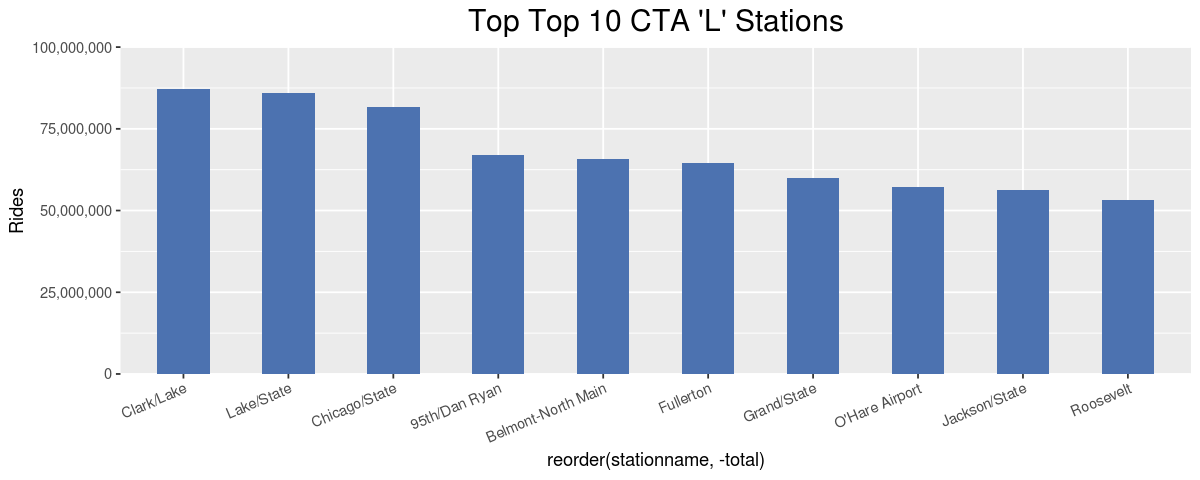

In [26]:
ggplot(head(agg_df, 10), aes(reorder(stationname, -total), total, fill=stationname)) + 
  geom_col(width=0.5) + guides(fill=FALSE) +
  labs(title="Top Top 10 CTA 'L' Stations", y="Rides") +
  scale_y_continuous(expand = c(0, 0), limits=c(0, 100000000), label=comma) +
  scale_fill_manual(values = rep("#4c72b0", 10)) +
  theme(plot.title = element_text(hjust=0.5, size=18),
        axis.text.x = element_text(angle = 23, hjust = 1))

In [27]:
rdf <- reshape(agg_df, varying = names(agg_df)[-1], v.names = "value",
               timevar = "aggregate", times = names(agg_df)[-1], idvar = "stationname", 
               new.row.names=1:10000, direction="long")

rdf <- rdf[rdf$stationname %in% head(agg_df$stationname,10) & rdf$aggregate!='total',]

head(rdf)

stationname        aggregate value
1 Clark/Lake         count     6300 
2 Lake/State         count     6301 
3 Chicago/State      count     6299 
4 95th/Dan Ryan      count     6274 
5 Belmont-North Main count     6299 
6 Fullerton          count     6300

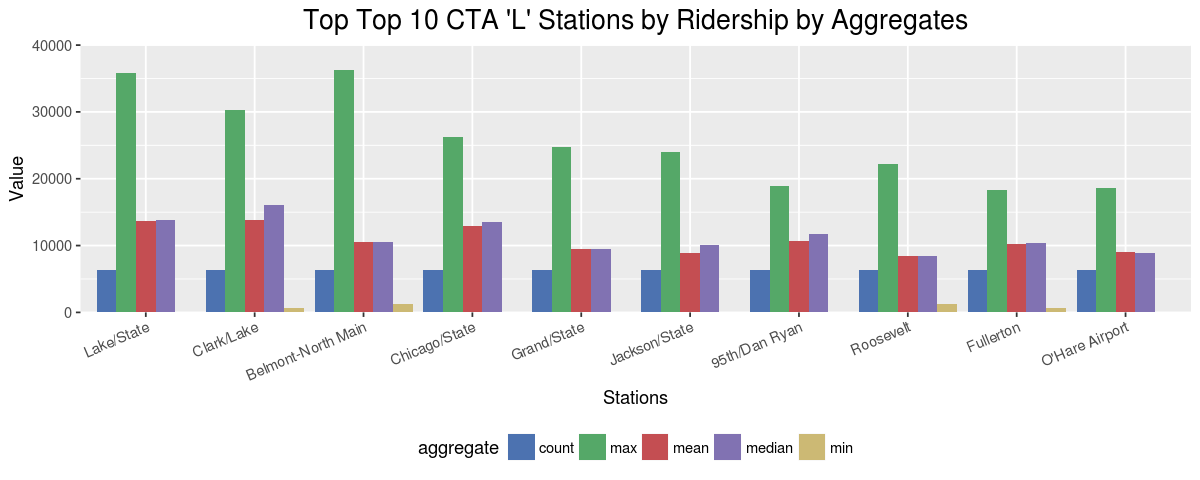

In [28]:
ggplot(rdf, aes(x=reorder(stationname, -value), y=value, fill=aggregate)) + 
  stat_summary(fun.y="sum", geom="bar", position="dodge") +
  labs(title="Top Top 10 CTA 'L' Stations by Ridership by Aggregates", x="Stations", y="Value") +
  scale_fill_manual(values = seabornPalette) +
  scale_y_continuous(expand = c(0, 0), lim=c(0,40000)) +
  theme(legend.position="bottom", plot.title = element_text(hjust=0.5, size=16),
        axis.text.x = element_text(angle = 23, hjust = 1))

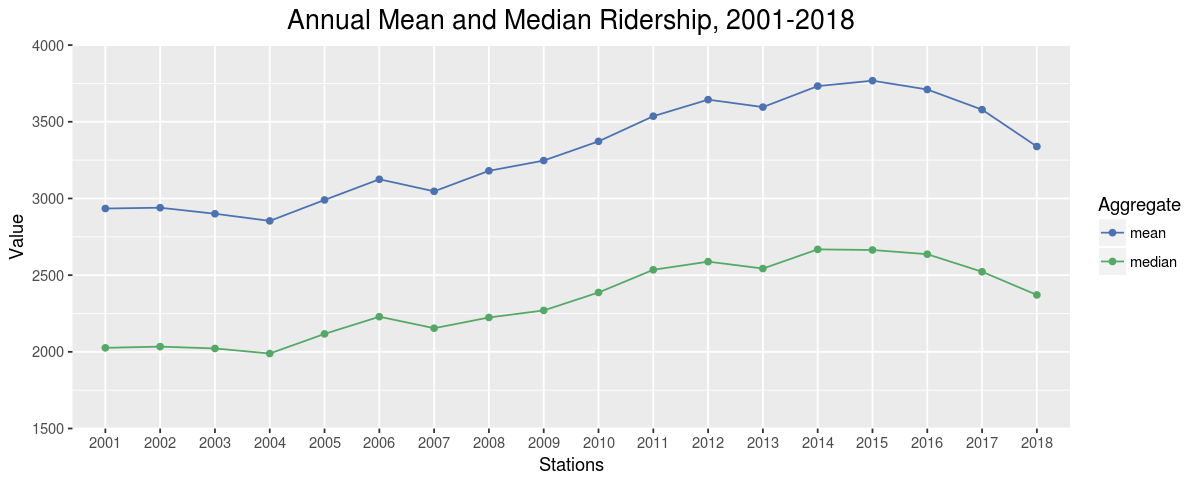

In [27]:
agg_df <- do.call(data.frame, 
                  aggregate(rides ~ year, transform(rides_df, year = as.factor(format(rides_df$date, '%Y'))), 
                  FUN = function(x) c(rides_mean = mean(x), rides_median = median(x))))

names(agg_df) <- gsub("rides.", "", names(agg_df)) 
                                        
rdf <- reshape(agg_df, varying = names(agg_df)[-1], v.names = "value",
               timevar = "aggregate", times = names(agg_df)[-1], idvar = "year", 
               new.row.names=1:10000, direction="long")

ggplot(rdf, aes(x=year, y=value, color=factor(aggregate), group = aggregate)) + 
  geom_line(stat="identity") + geom_point(stat="identity") +
  labs(title="Annual Mean and Median Ridership, 2001-2018", x="Stations", y="Value", color="Aggregate") +
  guides(fill=FALSE) +
  scale_y_continuous(expand = c(0, 0), lim=c(1500,4000)) +
  scale_colour_manual(values=c("#4c72b0","#55a868")) +
  theme(plot.title = element_text(hjust=0.5, size=16),
        axis.text.x = element_text(hjust = 0.5))     
                            

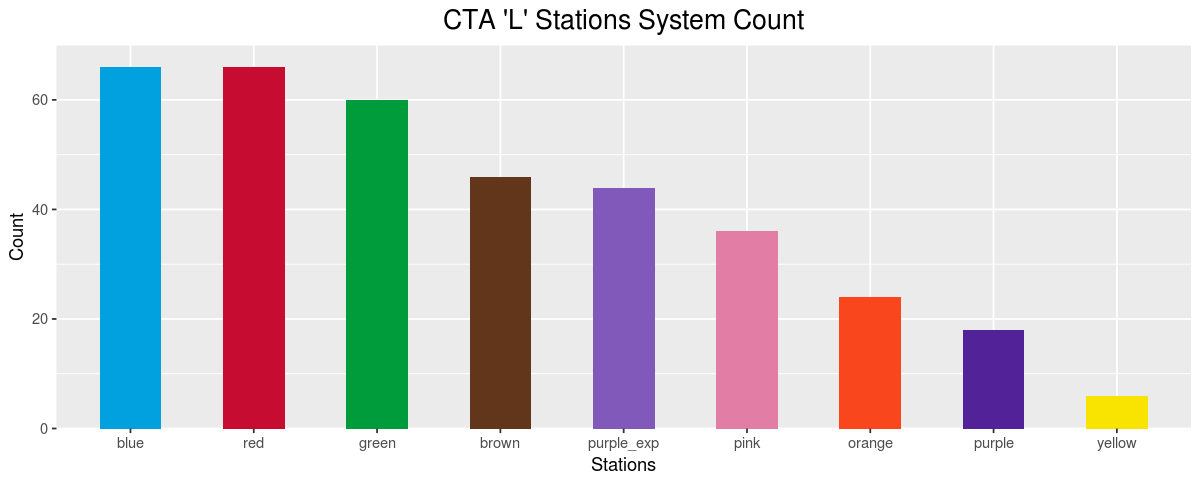

In [9]:
sub <- xml_df[c("stop_id", "direction_id", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")]

rdf <- reshape(sub, varying = names(sub)[3:ncol(sub)], v.names = "value",
               timevar = "line", times = names(sub)[3:ncol(sub)], idvar = c("stop_id", "direction_id"),
               new.row.names=1:10000, direction="long")

rdf$value <- as.integer(rdf$value)

ggplot(rdf, aes(x=reorder(line, -value), y=value, fill=line)) + 
  stat_summary(fun.y="sum", geom="bar", width=0.5, position="dodge") +
  labs(title="CTA 'L' Stations System Count", x="Stations", y="Count") + guides(fill=FALSE) +
  scale_fill_manual(values = c("#00A1DE", "#62361B", "#009B3A", "#F9461C", "#E27EA6", 
                               "#522398", "#8059BA", "#C60C30", "#F9E300")) +
  scale_y_continuous(expand = c(0, 0), lim=c(0,70)) +
  theme(legend.position="bottom", plot.title = element_text(hjust=0.5, size=16),
        axis.text.x = element_text(hjust = 0.5))

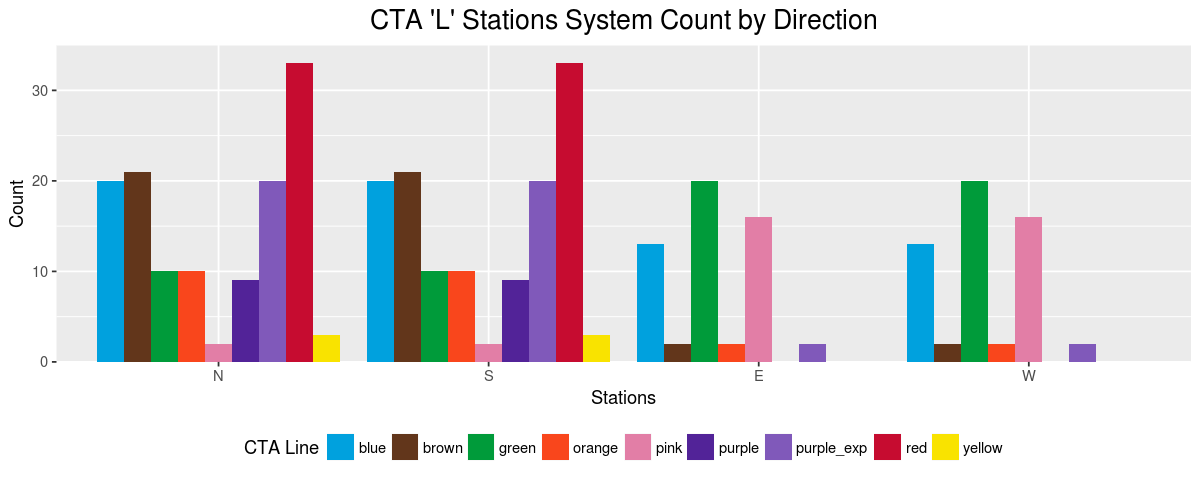

In [11]:
sub_df <- json_df[c("stop_id", "direction_id", "red", "blue", "green", "brown", "purple", "purple_exp", "yellow", "pink", "orange")]

rdf <- reshape(sub, varying = names(sub)[3:ncol(sub)], v.names = "value",
               timevar = "line", times = names(sub)[3:ncol(sub)], idvar = c("stop_id", "direction_id"),
               new.row.names=1:10000, direction="long")

rdf$value <- as.integer(rdf$value)

ggplot(rdf, aes(x=reorder(direction_id, -value), y=value, fill=line)) + 
  stat_summary(fun.y="sum", geom="bar", position="dodge") +
  labs(title="CTA 'L' Stations System Count by Direction", x="Stations", y="Count", fill="CTA Line") +
  scale_fill_manual(values = c("#00A1DE", "#62361B", "#009B3A", "#F9461C", "#E27EA6", 
                               "#522398", "#8059BA", "#C60C30", "#F9E300")) +
  scale_y_continuous(expand = c(0, 0), lim=c(0,35)) + guides(fill=guide_legend(nrow=1)) +
  theme(legend.position="bottom", plot.title = element_text(hjust=0.5, size=16),
        axis.text.x = element_text(hjust = 0.5))

## Reticulate 

<img src="IMAGES/Reticulate_Icon.png" style="height:50px;float:left;">

In [30]:
library(reticulate)

pd <- import("pandas")

r_df <- pd$read_csv("DATA/CTA_Ridership_L_Station_Entries_DailyTotals.csv")

head(r_df)

summary(r_df)


station_id stationname        date       daytype rides
1 40010      Austin-Forest Park 01/01/2001 U        290 
2 40020      Harlem-Lake        01/01/2001 U        633 
3 40030      Pulaski-Lake       01/01/2001 U        483 
4 40040      Quincy/Wells       01/01/2001 U        374 
5 40050      Davis              01/01/2001 U        804 
6 40060      Belmont-O'Hare     01/01/2001 U       1165

   station_id    stationname            date             daytype         
 Min.   :40010   Length:897032      Length:897032      Length:897032     
 1st Qu.:40370   Class :character   Class :character   Class :character  
 Median :40750   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40761                                                           
 3rd Qu.:41150                                                           
 Max.   :41700                                                           
     rides      
 Min.   :    0  
 1st Qu.: 1121  
 Median : 2316  
 Mean   : 3305  
 3rd Qu.: 4348  
 Max.   :36323  

## C/C++ Programming Calls

<img src="IMAGES/C_Logo.png" style="float:left;height:50px"/>
<img src="IMAGES/Cplusplus_Logo.png.png" style="float:left;height:50px"/>

In [31]:
# TOP TEN RIDES OVERALL
head(with(rides_df, rides_df[order(-rides_df$rides),]), 10)

station_id stationname        date       daytype rides
751850 41320      Belmont-North Main 2015-06-28 U       36323
594785 41320      Belmont-North Main 2012-06-24 U       36017
823147 41660      Lake/State         2016-11-04 W       35845
542705 41320      Belmont-North Main 2011-06-26 U       33795
822274 41420      Addison-North Main 2016-10-29 A       33615
647838 41320      Belmont-North Main 2013-06-30 U       30457
823043 40380      Clark/Lake         2016-11-04 W       30295
440057 41320      Belmont-North Main 2009-06-28 U       29457
491381 41320      Belmont-North Main 2010-06-27 U       29050
762667 41660      Lake/State         2015-09-11 W       28460

In [29]:
# C AND FORTRAN CALLERS
?.C()
?.Fortran()

## R CMD SHLIB my_code.c
## dyn.load('my_c_code.so')
## .C("myfunc", args)
## .Fortran("myfunc", args)

In [33]:
library(inline)

sum_top_rides <- cfunction(c(x = "ANY"), '
  int n = length(x);
  double sum = 0;

  SEXP out = PROTECT(allocVector(REALSXP, n));

  for (int i = 0; i < n; i++) {
    sum = sum + REAL(x)[i];
    REAL(out)[i] = sum;
  }

  UNPROTECT(1);

  return out;
')

sum_top_rides(c(36323, 36017, 35845, 33795, 33615, 30457, 30295, 29457, 29050, 28460))

[1]  36323  72340 108185 141980 175595 206052 236347 265804 294854 323314

In [37]:
library(Rcpp)

cppFunction('NumericVector cum_sum_rides(NumericVector x) {
  int n = x.size();
  double sum = 0;
  NumericVector top_rides(n);

  for(int i = 0; i < n; ++i) {
    sum += x[i];
    top_rides[i] = sum;
  }

  return top_rides;
}')


cum_sum_rides(head(with(rides_df, rides_df[order(-rides_df$rides),'rides']), 10))

[1]  36323  72340 108185 141980 175595 206052 236347 265804 294854 323314

## Data Applications

### Desktop GUI (Gwidgets)

<img src="IMAGES/Tcl-tk_Icon.gif" style="float:left;height:50px;"/>

In [ ]:
system(paste0("Rscript ", getwd(), "/APPS/GUI_R_GWidgets.R"))

### Web App (Shiny)

<img src="IMAGES/Shiny_Logo.png" style="float:left;height:50px;"/>

In [43]:
# LINUX SHELL COMMAND CALL
system(paste0("gnome-terminal -x Rscript -e \"library(shiny); setwd('", getwd(), "/APPS'); runApp('Web_Shiny_R.R')\""))

# MAC: replace "gnome-terminal -x" with "open -a"
# WINDOWS: replace "gnome-terminal -x" with "cmd.exe /k" (and wrap Rscript call in quotations)